In [84]:
import pandas as pd
import sklearn
import time
import numpy as np
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib
%pylab inline
#%%

t1 = time.time()
print('Loading database ...')
df = pd.read_hdf('database/all_data_comp.h5','table')
print('Time to load database:', time.time()-t1)
#%%

# Variable names.
import var_names
d = var_names.d

Populating the interactive namespace from numpy and matplotlib
Loading database ...
Time to load database: 2.152749538421631


# Variables to use. First only RPM.

| test_no | rpm | FRP | exh_T | TC_rpm |
|--|--|--|--|--|
| 1  | x | _ | _ | _ |
| 2  | x | x | _ | _ |
| 3  | x | x | x | _ |
| 4  | x | x | x | x |
| 5  | _ | x | _ | _ |
| 6  | _ | x | x | _ |
| 7  | _ | x | x | x |
| 8  | x | x | _ | _ |
| 9  | _ | _ | x | _ |
| 10 | _ | _ | x | x |
| 11 | x | _ | x | _ |
| 12 | _ | _ | _ | x |
| 13 | x | _ | _ | _ |
| 14 | x | _ | _ | _ |
| 15 | x | _ | _ | _ |
| 16 | x | _ | _ | _ |



In [2]:
# Check number of combinations, just to be sure.



features =  ['rpm',
             'frp',
             'exh_T',
             'TC_rpm']



import itertools

def list_of_combs(arr):
    """returns a list of all subsets of a list"""
    
    combs = []
    for i in range(1, len(arr)+1):
        listing = [list(x) for x in itertools.combinations(arr, i)]
        combs.extend(listing)
    return combs

# Not used, does not produce a good list..
#
#for l in range(1, len(features)+1):
#    for subset in itertools.combinations(features, l):
#        print(subset)
#        
#comb = list()
#
#for i in range(0,len(features)):
#    for a in itertools.combinations(features,i+1):
#        comb.append(a)

combinations = list_of_combs(features)
for i in range(len(combinations)):
    print(combinations[i])

print('\nNumber of combinations:',len(combinations))


['rpm']
['frp']
['exh_T']
['TC_rpm']
['rpm', 'frp']
['rpm', 'exh_T']
['rpm', 'TC_rpm']
['frp', 'exh_T']
['frp', 'TC_rpm']
['exh_T', 'TC_rpm']
['rpm', 'frp', 'exh_T']
['rpm', 'frp', 'TC_rpm']
['rpm', 'exh_T', 'TC_rpm']
['frp', 'exh_T', 'TC_rpm']
['rpm', 'frp', 'exh_T', 'TC_rpm']

Number of combinations: 15


In [90]:
d['ae1_rpm']

'AE1 ENG SPEED:1745:RPM:Average:900'

In [109]:

# The combinations are done manually in an Excel workbook, it was too tedious to make. This way it is easier but
# might not be the best way... it works...


feat = pd.read_excel('training_setup.xlsx',index_col='test_no')

# Create a list of features for each test. A list which will contain a list of features for each row. This list
# will be used for the training.

test_features = list()


for i in range(30):
    
    tmp_l = list()
    
    if feat.iloc[i][0] == 1:
        #print('ett')
        for j in range(1,5):
            tmp_l.append(d[feat.iloc[i][j]])
            print('Test:',i+1,feat.iloc[i][j])
        
    elif feat.iloc[i][0] == 2:
        #print('två')
        for j in range(1,5):
            tmp_l.append(d[feat.iloc[i][j]])
            print('Test:',i+1,feat.iloc[i][j])
        for j in range(5,9):
            tmp_l.append(d[feat.iloc[i][j]])
            print('Test:',i+1,feat.iloc[i][j])
        
    elif feat.iloc[i][0] == 3:
        for j in range(1,5):
            tmp_l.append(d[feat.iloc[i][j]])
            print('Test:',i+1,feat.iloc[i][j])
        for j in range(5,9):
            tmp_l.append(d[feat.iloc[i][j]])
            print('Test:',i+1,feat.iloc[i][j])
        for j in range(9,13):
            tmp_l.append(d[feat.iloc[i][j]])
            print('Test:',i+1,feat.iloc[i][j])
        
    elif feat.iloc[i][0] == 4:
        for j in range(1,5):
            tmp_l.append(d[feat.iloc[i][j]])
            print('Test:',i+1,feat.iloc[i][j])
        for j in range(5,9):
            tmp_l.append(d[feat.iloc[i][j]])
            print('Test:',i+1,feat.iloc[i][j])
        for j in range(9,13):
            tmp_l.append(d[feat.iloc[i][j]])
            print('Test:',i+1,feat.iloc[i][j])
        for j in range(13,17):
            tmp_l.append(d[feat.iloc[i][j]])
            print('Test:',i+1,feat.iloc[i][j])
    
    test_features.append(tmp_l)

# And then at last add the corresponding predictor to each test set.


for i in range(len(test_features)):
    if 'AE1' in test_features[i][0]:
        test_features[i].append(d['fo_booster_13'])
    if 'AE2' in test_features[i][0]:
        test_features[i].append(d['fo_booster_24'])


Test: 1 ae1_rpm
Test: 1 ae3_rpm
Test: 1 me1_rpm
Test: 1 me3_rpm
Test: 2 ae1_frp
Test: 2 ae3_frp
Test: 2 me1_frp
Test: 2 me3_frp
Test: 3 ae1_exh_T
Test: 3 ae3_exh_T
Test: 3 me1_exh_T
Test: 3 me3_exh_T
Test: 4 ae1_TC_rpm
Test: 4 ae3_TC_rpm
Test: 4 me1_TC_rpm
Test: 4 me3_TC_rpm
Test: 5 ae1_rpm
Test: 5 ae3_rpm
Test: 5 me1_rpm
Test: 5 me3_rpm
Test: 5 ae1_frp
Test: 5 ae3_frp
Test: 5 me1_frp
Test: 5 me3_frp
Test: 6 ae1_rpm
Test: 6 ae3_rpm
Test: 6 me1_rpm
Test: 6 me3_rpm
Test: 6 ae1_exh_T
Test: 6 ae3_exh_T
Test: 6 me1_exh_T
Test: 6 me3_exh_T
Test: 7 ae1_rpm
Test: 7 ae3_rpm
Test: 7 me1_rpm
Test: 7 me3_rpm
Test: 7 ae1_TC_rpm
Test: 7 ae3_TC_rpm
Test: 7 me1_TC_rpm
Test: 7 me3_TC_rpm
Test: 8 ae1_frp
Test: 8 ae3_frp
Test: 8 me1_frp
Test: 8 me3_frp
Test: 8 ae1_exh_T
Test: 8 ae3_exh_T
Test: 8 me1_exh_T
Test: 8 me3_exh_T
Test: 9 ae1_frp
Test: 9 ae3_frp
Test: 9 me1_frp
Test: 9 me3_frp
Test: 9 ae1_TC_rpm
Test: 9 ae3_TC_rpm
Test: 9 me1_TC_rpm
Test: 9 me3_TC_rpm
Test: 10 ae1_exh_T
Test: 10 ae3_exh_T
Test: 

In [112]:
test_features[15]

['AE2 ENG SPEED:2745:RPM:Average:900',
 'AE4 ENG SPEED:4745:RPM:Average:900',
 'ME2 ENGINE SPEED:2364:rpm:Average:900',
 'ME4 ENGINE SPEED:4364:rpm:Average:900',
 'FO BOOST 2 CONSUMPT:6166:m3/h:Average:900']

In [101]:
df[test_features[0]]

,AE1 ENG SPEED:1745:RPM:Average:900,AE3 ENG SPEED:3745:RPM:Average:900,ME1 ENGINE SPEED:1364:rpm:Average:900,ME3 ENGINE SPEED:3364:rpm:Average:900
Time,,,,
2013-09-20 00:00:00,NaN,NaN,NaN,NaN
2013-09-20 00:15:00,NaN,NaN,NaN,NaN
2013-09-20 00:30:00,NaN,NaN,NaN,NaN
2013-09-20 00:45:00,NaN,NaN,NaN,NaN
2013-09-20 01:00:00,NaN,NaN,NaN,NaN
2013-09-20 01:15:00,NaN,NaN,NaN,NaN
2013-09-20 01:30:00,NaN,NaN,NaN,NaN
2013-09-20 01:45:00,NaN,NaN,NaN,NaN
2013-09-20 02:00:00,NaN,NaN,NaN,NaN


In [114]:
test_no = 0
df_test = df[test_features[test_no]].dropna()
df_test.drop(df_test.columns[len(df_test.columns)-1],axis=1)

,AE1 ENG SPEED:1745:RPM:Average:900,AE3 ENG SPEED:3745:RPM:Average:900,ME1 ENGINE SPEED:1364:rpm:Average:900,ME3 ENGINE SPEED:3364:rpm:Average:900
Time,,,,
2013-12-01 00:00:00,750.400000,0.000000,0.000000,0.476191
2013-12-01 00:15:00,750.600000,0.000000,0.000000,0.476191
2013-12-01 00:30:00,751.733333,0.000000,0.000000,0.476191
2013-12-01 00:45:00,750.666667,0.000000,0.000000,0.476191
2013-12-01 01:00:00,752.000000,0.000000,0.000000,0.476191
2013-12-01 01:15:00,749.533333,0.000000,0.000000,0.476191
2013-12-01 01:30:00,751.866667,0.000000,0.000000,0.476191
2013-12-01 01:45:00,750.333333,0.000000,0.000000,0.476191
2013-12-01 02:00:00,750.533333,0.000000,0.000000,0.476191


In [119]:
len(df_test.columns)

5

In [104]:
test_features[0]

['AE1 ENG SPEED:1745:RPM:Average:900',
 'AE3 ENG SPEED:3745:RPM:Average:900',
 'ME1 ENGINE SPEED:1364:rpm:Average:900',
 'ME3 ENGINE SPEED:3364:rpm:Average:900',
 'FO BOOST 1 CONSUMPT:6165:m3/h:Average:900']

In [ ]:
# Train model
# 

from sklearn.externals import joblib
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split

gen = 1
cores = -1

# plotting setup

n1 = 100
sample_n = 200


for test_no in range(len(test_features)):
    
    print('Test number: ', test_no, '\n')
    df_test = df[test_features[test_no]].dropna()
    X = np.array(df_test.drop(df_test.columns[len(df_test.columns)-1],axis=1))
    y = np.array(df_test[df_test.columns[len(df_test.columns)-1]])

    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25)
    tpot = TPOTRegressor(generations=gen, population_size=50, verbosity=2, n_jobs=cores)
    tpot.fit(X_train, y_train.reshape(-1,))
    
    features_readable = list()
    for t in range(len(test_features[test_no])):
        features_readable.append(d[test_features[test_no][t]])

    x = linspace(n1+1,n1+sample_n,sample_n)
    fig, ax = plt.subplots()
    fig.set_size_inches(22, 13)
    plt.plot(x,tpot.predict(X_test)[n1:n1+sample_n])
    plt.plot(x,y_test[n1:n1+sample_n])

    ax.set(xlabel='sample no', ylabel='FO flow m3/h',
           title='Training number:' + str(test_no) + '\nFeatures: \n '+ str(features_readable))
    ax.grid()

    fig.savefig("results/test_no_" + str(test_no) + ".png")



Test number:  0 



Generation 1 - Current best internal CV score: -0.014287421625278875

Best pipeline: ExtraTreesRegressor(XGBRegressor(input_matrix, learning_rate=0.1, max_depth=2, min_child_weight=2, n_estimators=100, nthread=1, subsample=1.0), bootstrap=False, max_features=0.8, min_samples_leaf=10, min_samples_split=6, n_estimators=100)
Test number:  1 



Generation 1 - Current best internal CV score: -0.0114128508423801

Best pipeline: ExtraTreesRegressor(input_matrix, bootstrap=True, max_features=0.2, min_samples_leaf=1, min_samples_split=16, n_estimators=100)
Test number:  2 



Optimization Progress:  50%|█████     | 50/100 [01:37<09:34, 11.48s/pipeline]

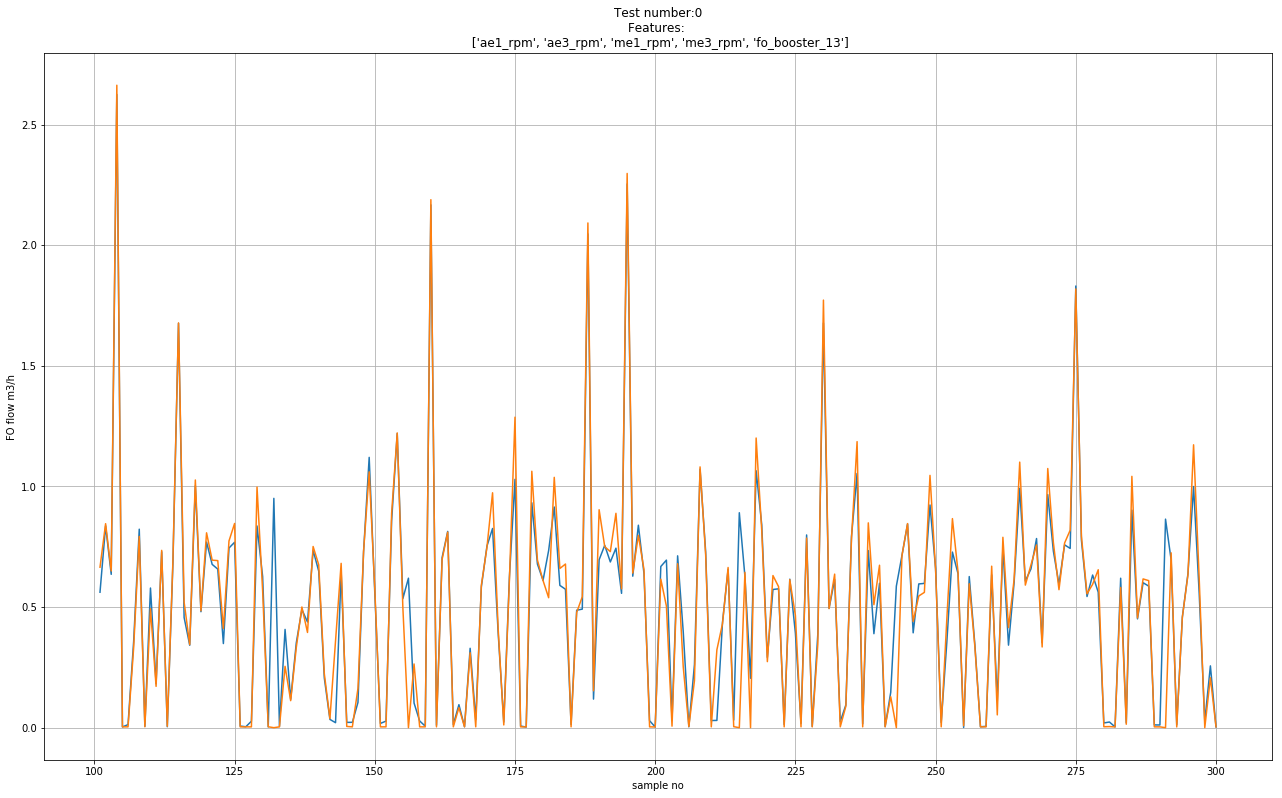

In [128]:
features_readable = list()
for t in range(len(test_features[test_no])):
    features_readable.append(d[test_features[test_no][t]])
    
x = linspace(n1+1,n1+sample_n,sample_n)
fig, ax = plt.subplots()
fig.set_size_inches(22, 13)
plt.plot(x,tpot.predict(X_test)[n1:n1+sample_n])
plt.plot(x,y_test[n1:n1+sample_n])

ax.set(xlabel='sample no', ylabel='FO flow m3/h',
       title='Training number:' + str(test_no) + '\nFeatures: \n '+ str(features_readable))
ax.grid()

fig.savefig("results/test_no_" + str(test_no) + ".png")

In [122]:
df_test[df_test.columns[len(df_test.columns)-1]]

Time
2013-12-01 00:00:00    0.000000
2013-12-01 00:15:00    0.000000
2013-12-01 00:30:00    0.000000
2013-12-01 00:45:00    0.000000
2013-12-01 01:00:00    0.000000
2013-12-01 01:15:00    0.000000
2013-12-01 01:30:00    0.000000
2013-12-01 01:45:00    0.000000
2013-12-01 02:00:00    0.000000
2013-12-01 02:15:00    0.000000
2013-12-01 02:30:00    0.000000
2013-12-01 02:45:00    0.000000
2013-12-01 03:00:00    0.000000
2013-12-01 03:15:00    0.000000
2013-12-01 03:30:00    0.000000
2013-12-01 03:45:00    0.000000
2013-12-01 04:00:00    0.000000
2013-12-01 04:15:00    0.000000
2013-12-01 04:30:00    0.000000
2013-12-01 04:45:00    0.000000
2013-12-01 05:00:00    0.000000
2013-12-01 05:15:00    0.000000
2013-12-01 05:30:00    0.000000
2013-12-01 05:45:00    0.000000
2013-12-01 06:00:00    0.000000
2013-12-01 06:15:00    0.000000
2013-12-01 06:30:00    0.000000
2013-12-01 06:45:00    0.000000
2013-12-01 07:00:00    0.000000
2013-12-01 07:15:00    0.000000
                         ...   
201

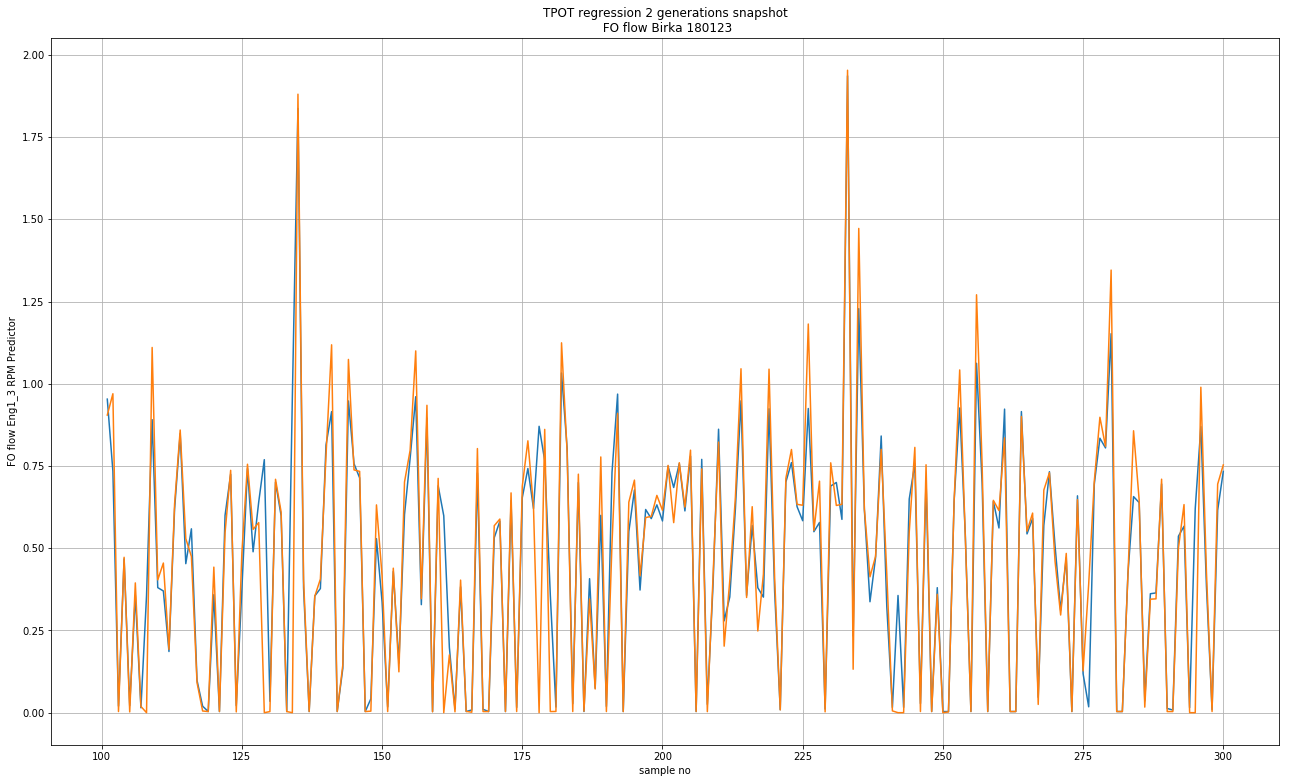

In [71]:

n1 = 100
sample_n = 200
x = linspace(n1+1,n1+sample_n,sample_n)

fig, ax = plt.subplots()

fig.set_size_inches(22, 13)

plt.plot(x,tpot.predict(X_test)[n1:n1+sample_n])
plt.plot(x,y_test[n1:n1+sample_n])

ax.set(xlabel='sample no', ylabel='FO flow Eng1_3 RPM Predictor',
       title='TPOT regression 2 generations snapshot\n FO flow Birka 180123')
ax.grid()

fig.savefig("tpot_eng13_rpm_2gen.png")
plt.show()


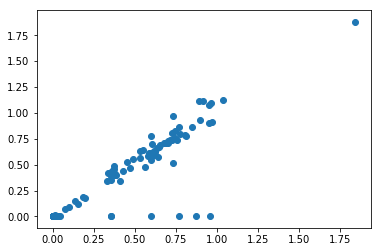

In [29]:
plt.scatter(tpot.predict(X_test)[100:200],y_test[100:200])

In [57]:
linspace(100,200)

array([100.        , 102.04081633, 104.08163265, 106.12244898,
       108.16326531, 110.20408163, 112.24489796, 114.28571429,
       116.32653061, 118.36734694, 120.40816327, 122.44897959,
       124.48979592, 126.53061224, 128.57142857, 130.6122449 ,
       132.65306122, 134.69387755, 136.73469388, 138.7755102 ,
       140.81632653, 142.85714286, 144.89795918, 146.93877551,
       148.97959184, 151.02040816, 153.06122449, 155.10204082,
       157.14285714, 159.18367347, 161.2244898 , 163.26530612,
       165.30612245, 167.34693878, 169.3877551 , 171.42857143,
       173.46938776, 175.51020408, 177.55102041, 179.59183673,
       181.63265306, 183.67346939, 185.71428571, 187.75510204,
       189.79591837, 191.83673469, 193.87755102, 195.91836735,
       197.95918367, 200.        ])

In [2]:
#More predictors

eng_13 = [d['ae1_rpm'],
          d['ae3_rpm'],
          d['me1_rpm'],
          d['me3_rpm'],
          d['ae1_frp'],
          d['ae3_frp'],
          d['me1_frp'],
          d['me3_frp'],
          d['ae1_exh_T'],
          d['ae3_exh_T'],
          d['me1_exh_T'],
          d['me3_exh_T'],
          d['fo_booster_13']
          ]

eng_24 = [d['ae2_rpm'],
          d['ae4_rpm'],
          d['me2_rpm'],
          d['me4_rpm'],
          d['ae2_frp'],
          d['ae4_frp'],
          d['me2_frp'],
          d['me4_frp'],
          d['ae2_exh_T'],
          d['ae4_exh_T'],
          d['me2_exh_T'],
          d['me4_exh_T'],
          d['fo_booster_24']
          ]

#%%

####
#### Training the first set with only rpm predictor
####

print('Features and predictions for training 2:\n\nEngine 1_3:')

for n in eng_13:
    print('- ',d[n])
print('\nEngine 2_4:')
for n in eng_24:
    print('- ',d[n])

print('\nDate: ',time.strftime('%y%m%d'))
print('Time: ',time.strftime('%H:%M:%S'))

Features and predictions for training 2:

Engine 1_3:
-  ae1_rpm
-  ae3_rpm
-  me1_rpm
-  me3_rpm
-  ae1_frp
-  ae3_frp
-  me1_frp
-  me3_frp
-  ae1_exh_T
-  ae3_exh_T
-  me1_exh_T
-  me3_exh_T
-  fo_booster_13

Engine 2_4:
-  ae2_rpm
-  ae4_rpm
-  me2_rpm
-  me4_rpm
-  ae2_frp
-  ae4_frp
-  me2_frp
-  me4_frp
-  ae2_exh_T
-  ae4_exh_T
-  me2_exh_T
-  me4_exh_T
-  fo_booster_24

Date:  180125
Time:  09:13:59


In [37]:

# We do not have the full time extent for the dataset, so we have to filter out.

date_begin = '2014-02-01'
date_end = '2014-12-16'


# The dataset is not complete overlapping in time with data from both the mass-flow meters and the
# the rest of the data. So we have to manually filter out the time interval which we are interested in.

    
#df_1_3[labels_1_3].plot()
#df_2_4[labels_2_4].plot()

df_1_3 = df[eng_13][date_begin:date_end].dropna()
df_2_4 = df[eng_24][date_begin:date_end].dropna()

for n in list(df_1_3):
    df_1_3[n][(df_1_3[n] < 0)] = 0

for n in list(df_2_4):
    df_2_4[n][(df_2_4[n] < 0)] = 0

In [38]:
# Train model
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split

gen = 10
cores = -1

X = np.array(df_1_3.drop(labels=d['fo_booster_13'],axis=1))
y = np.array(df_1_3[d['fo_booster_13']])

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25)
tpot = TPOTRegressor(generations=gen, population_size=50, verbosity=2, n_jobs=cores)
tpot.fit(X_train, y_train.reshape(-1,))

Optimization Progress:  18%|█▊        | 100/550 [05:14<5:02:37, 40.35s/pipeline]

Generation 1 - Current best internal CV score: -0.0005150505377516242


Optimization Progress:  27%|██▋       | 150/550 [09:57<5:24:32, 48.68s/pipeline]

Generation 2 - Current best internal CV score: -0.0005150505377516242


Optimization Progress:  36%|███▋      | 200/550 [12:48<3:35:31, 36.95s/pipeline]

Generation 3 - Current best internal CV score: -0.0005025807327483556


Optimization Progress:  46%|████▌     | 251/550 [19:56<7:07:28, 85.78s/pipeline]  

Generation 4 - Current best internal CV score: -0.0004433178864024472


Optimization Progress:  55%|█████▌    | 303/550 [28:27<7:34:18, 110.36s/pipeline] 

Generation 5 - Current best internal CV score: -0.00043688187079889043


Optimization Progress:  64%|██████▍   | 353/550 [36:09<2:53:03, 52.71s/pipeline] 

Generation 6 - Current best internal CV score: -0.00043688187079889043


Optimization Progress:  73%|███████▎  | 404/550 [44:58<3:35:34, 88.59s/pipeline] 

Generation 7 - Current best internal CV score: -0.0004313508248079838


Optimization Progress:  83%|████████▎ | 454/550 [51:49<2:22:30, 89.07s/pipeline] 

Generation 8 - Current best internal CV score: -0.0004223173374471396


Optimization Progress:  92%|█████████▏| 504/550 [1:00:36<41:14, 53.79s/pipeline]

Generation 9 - Current best internal CV score: -0.0004223173374471396


Generation 10 - Current best internal CV score: -0.0004122473363683386

Best pipeline: RandomForestRegressor(ExtraTreesRegressor(ElasticNetCV(RidgeCV(RobustScaler(input_matrix)), l1_ratio=0.75, tol=1e-05), bootstrap=False, max_features=0.95, min_samples_leaf=1, min_samples_split=7, n_estimators=100), bootstrap=False, max_features=0.25, min_samples_leaf=1, min_samples_split=9, n_estimators=100)


TPOTRegressor(config_dict={'sklearn.linear_model.ElasticNetCV': {'l1_ratio': array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,
        0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,
        0.9 ,  0.95,  1.  ]), 'tol': [1e-05, 0.0001, 0.001, 0.01, 0.1]}, 'sklearn.ensemble.ExtraT....45,
        0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,  0.9 ,
        0.95,  1.  ])}}}},
       crossover_rate=0.1, cv=5, disable_update_check=False,
       early_stop=None, generations=10, max_eval_time_mins=5,
       max_time_mins=None, memory=None, mutation_rate=0.9, n_jobs=8,
       offspring_size=50, periodic_checkpoint_folder=None,
       population_size=50, random_state=None, scoring=None, subsample=1.0,
       verbosity=2, warm_start=False)

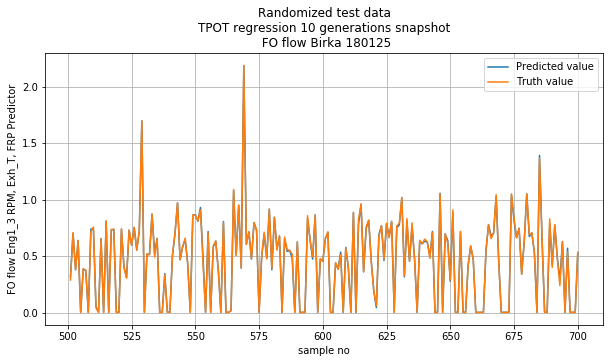

In [41]:

n1 = 500
sample_n = 200
x = linspace(n1+1,n1+sample_n,sample_n)

fig, ax = plt.subplots()

fig.set_size_inches(10, 5)

plt.plot(x,tpot.predict(X_test)[n1:n1+sample_n],label='Predicted value')
plt.plot(x,y_test[n1:n1+sample_n],label='Truth value')

ax.set(xlabel='sample no', ylabel='FO flow Eng1_3 RPM, Exh_T, FRP Predictor',
       title='Randomized test data\nTPOT regression 10 generations snapshot\n FO flow Birka 180125')
ax.grid()

plt.legend()

fig.savefig("tpot_eng13_rpm_exh_t_frp_pred_10gen.png",dpi=300)
plt.show()

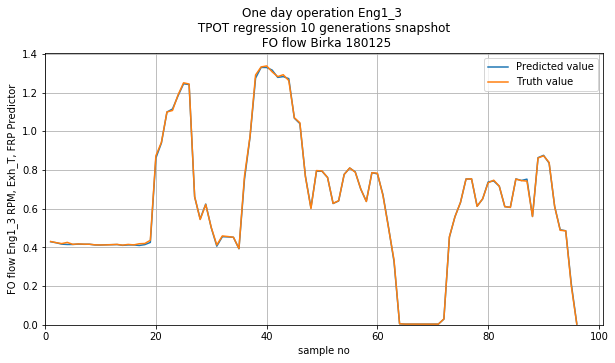

In [50]:

#Not randomized data. During a full day of operation.

n1 = 0
sample_n = 96
x = linspace(n1+1,n1+sample_n,sample_n)

fig, ax = plt.subplots()

fig.set_size_inches(10, 5)

plt.plot(x,tpot.predict(X)[n1:n1+sample_n],label='Predicted value')
plt.plot(x,y[n1:n1+sample_n],label='Truth value')

ax.set(xlabel='sample no', ylabel='FO flow Eng1_3 RPM, Exh_T, FRP Predictor',
       title='One day operation Eng1_3 \n TPOT regression 10 generations snapshot \n FO flow Birka 180125')
ax.grid()

plt.xlim(0)
plt.ylim(0)

plt.legend()

fig.savefig("tpot_eng13_op-data-rpm_exh_t_frp_pred_10gen.png",dpi=400)
plt.show()

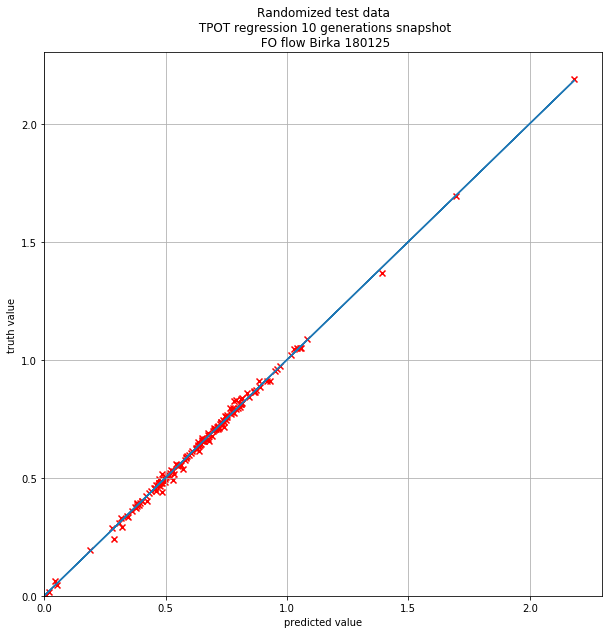

In [43]:

n1 = 500
sample_n = 200
x = linspace(n1+1,n1+sample_n,sample_n)

fig, ax = plt.subplots()

fig.set_size_inches(10, 10)

plt.scatter(tpot.predict(X_test)[n1:n1+sample_n],y_test[n1:n1+sample_n],color='r',marker='x')
plt.plot(tpot.predict(X_test)[n1:n1+sample_n],tpot.predict(X_test)[n1:n1+sample_n])

#plt.scatter(n1,n1+sample_n)

ax.set(xlabel='predicted value', ylabel='truth value',
       title='Randomized test data\n TPOT regression 10 generations snapshot\n FO flow Birka 180125')
ax.grid()

#plt.legend()
plt.xlim(0)
plt.ylim(0)

fig.savefig("tpot_eng13_scatter_rpm_exh_t_frp_pred_10gen.png",dpi=300)
plt.show()

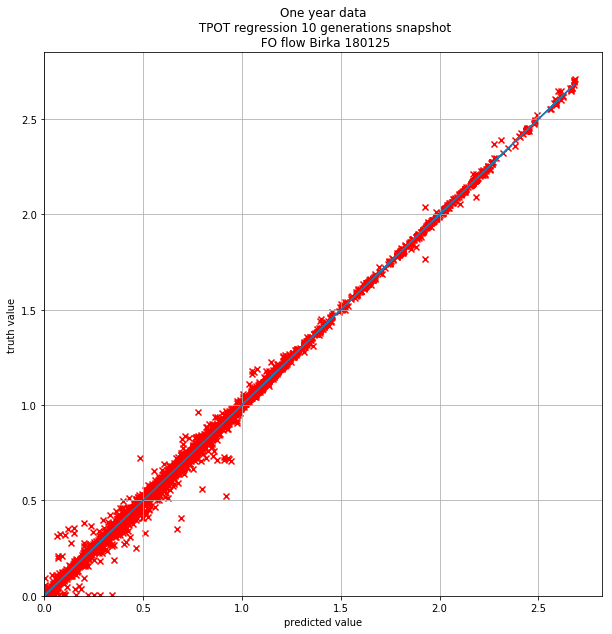

In [45]:


fig, ax = plt.subplots()

fig.set_size_inches(10, 10)

plt.scatter(tpot.predict(X),y,color='r',marker='x')
plt.plot(tpot.predict(X),tpot.predict(X))

#plt.scatter(n1,n1+sample_n)

ax.set(xlabel='predicted value', ylabel='truth value',
       title='One year data\n TPOT regression 10 generations snapshot\n FO flow Birka 180125')
ax.grid()

#plt.legend()
plt.xlim(0)
plt.ylim(0)

fig.savefig("tpot_eng13_all_scatter_rpm_exh_t_frp_pred_10gen.png",dpi=300)
plt.show()

In [47]:
tpot.export('gen10_eng13_180125.py')

True

In [65]:
tpot.score(X_test,y_test)

-0.00043115201403833437

In [66]:
print('MSE in % ', abs(tpot.score(X_test,y_test)/max(y)*100))

MSE in %  0.0159167150182


In [67]:
from sklearn.metrics import mean_squared_error
mean_squared_error(tpot.predict(X_test),y_test)

0.00043115201403833437

In [ ]:

for n in list(df_1_3):
    df_1_3[n][(df_1_3[n] < 0)] = 0

for n in list(df_2_4):
    df_2_4[n][(df_2_4[n] < 0)] = 0
    
df_1_3[labels_1_3].plot()
df_2_4[labels_2_4].plot()